## 1. Import all required libraries

In [1]:
#for loading data and for performing data analysis operations on it
import pandas as pd
import numpy as np


#for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#for splitting dataset
from sklearn.model_selection import train_test_split


#for data scaling
from sklearn.preprocessing import StandardScaler


#for PCA (feature engineering)
from sklearn.decomposition import PCA


#for fitting SVM model
from sklearn.svm import SVC

#for displaying evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 2. Load the data

In [4]:
data=pd.read_csv(r"D:\Artificial_Intelligence\AI\Supervised_Learning\14_SVM\breast_cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Data exploration

In [5]:
data.shape

(569, 33)

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [8]:
data.shape

(569, 31)

In [9]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [11]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [12]:
# Map malignent as 1 and benile as 0
data["diagnosis"]=data["diagnosis"].map({"M":1,'B':0})

In [13]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
X=data.drop("diagnosis",axis=1)
y=data["diagnosis"]

1. For model fitting we will need numerical data only, but here the 'diagnosis' data is not numerical.
2. The categorical data has to be converted to numerical data.

    Let's use mapping method for converting categorical data to numerical data

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [23]:
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of X_train (398, 30)
shape of X_test (171, 30)
shape of y_train (398,)
shape of y_test (171,)


Check correlation among predictors

In [24]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


It is difficult to identify the attributes which are strongly using the numerical data produced by corr() method, so let's use seaborn heatmap to visualize the correlations among the attributes.

<AxesSubplot:>

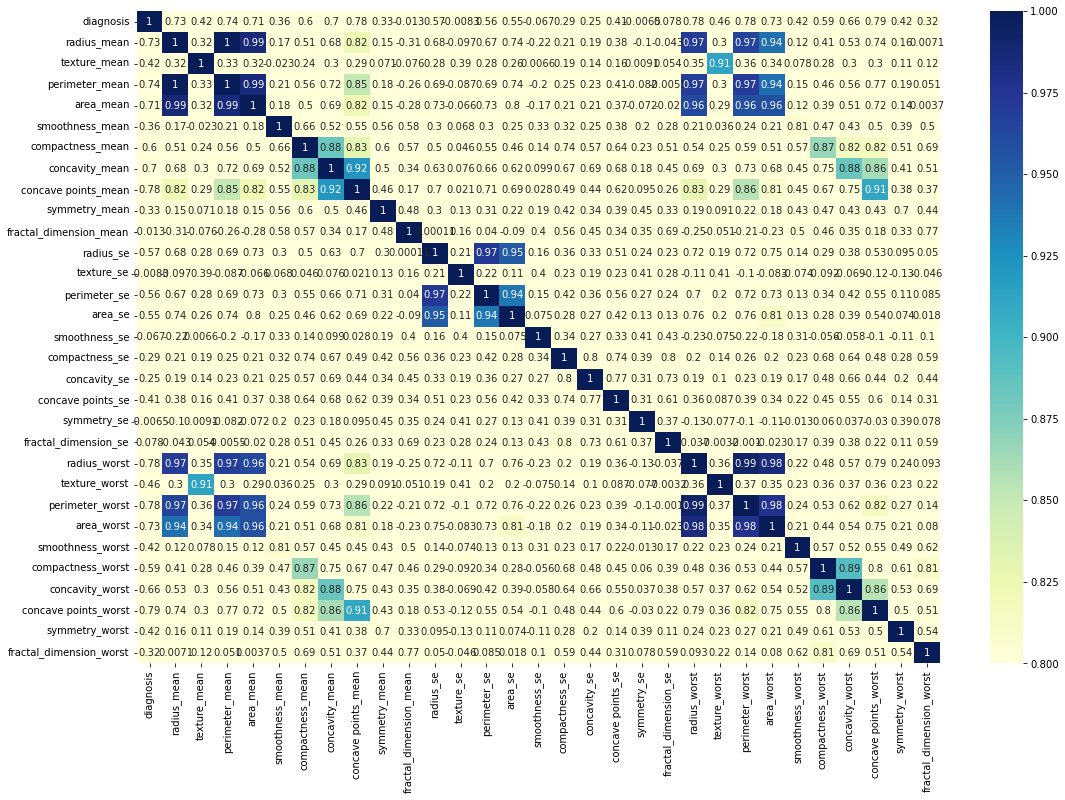

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',vmin=0.80)

What we can observe from the above correlations heatmap?

It is observed that there are some attributes which are highly correlated with each other whereas other attributes are loosely correlated with each other.
Attributes like 'radius_x' , 'perimeter_x' , 'area_x' are highly correlated because perimeter and area depend on radius, so we can use 'radius_x' and ignore perimeter, area attributes in our data analysis.
After observing the correlation heatmap we can say what attributes among the predictors will be useful for predictions and which can be ignored.

In [18]:
# Differentiate dependent and independent data
X=data.drop("diagnosis",axis=1)
y=data["diagnosis"]

In [19]:
X.shape

(569, 30)

In [20]:
y.shape

(569,)

In [21]:
#1 scale the data
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(X))
#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se
X_scaled_drop = scaled.drop(scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)
#3 apply PCA on scaled data
X_scaled_drop .shape

(569, 24)

## 4. PCA (Principal component analysis)/Dimensionality reduction

In [22]:
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(X_scaled_drop)

In [23]:
x_pca.shape

(569, 11)

In [24]:
print("Before PCA, X dataframe shape = ",X_scaled_drop .shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (569, 24) 
After PCA, x_pca dataframe shape =  (569, 11)


In [25]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.960255820189289


## 5. Split data for training and testing

In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [27]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9,10
0,8.066802,0.414765,-2.538073,-2.608014,-1.344494,1.435172,-1.713811,-0.491329,0.655096,0.544224,0.718321
1,0.106798,-2.761727,-0.141345,-1.395074,0.130814,0.017362,-0.333451,-0.389474,-0.706687,0.114084,0.405121
2,4.386099,-1.969883,-0.226679,-1.108399,-0.700594,0.477506,0.287285,-0.079434,-0.352640,-0.654396,-0.284427
3,10.670616,5.914865,-4.302831,1.998226,-1.846898,3.101734,-0.812473,-1.813327,1.334007,-0.454319,-1.428596
4,2.037480,-1.154659,0.905585,-3.346186,-0.640128,-1.333159,0.604286,-0.462435,-0.232974,0.375830,0.567374
...,...,...,...,...,...,...,...,...,...,...,...
564,3.464076,-3.124508,2.453912,-1.985629,-0.971193,-2.468019,0.402226,0.219779,-0.667509,0.323944,-0.186298
565,1.507611,-3.197409,3.228360,1.555287,-0.687792,-0.317986,-0.279609,1.064924,0.246603,0.048592,-0.082502
566,0.377581,-2.055061,1.726426,0.991199,1.870742,-0.498598,0.448674,-0.191792,-0.614166,-0.625285,-0.429997
567,9.696334,-1.475511,-0.598504,2.187156,0.495023,0.583066,-0.482184,-0.086248,0.311661,-0.359768,0.669406


In [28]:
X_train,X_test,y_train,y_test=train_test_split(pd.DataFrame(x_pca),y,test_size=0.25,random_state=0)

In [29]:
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of X_train (426, 11)
shape of X_test (143, 11)
shape of y_train (426,)
shape of y_test (143,)


## 6. SVM model fitting

In [30]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [31]:
y_predict=svc.predict(X_test)

In [32]:
y_predict.shape

(143,)

In [33]:
cm=confusion_matrix(y_test,y_predict)
print("Confusion_matrix:\n",cm)

Confusion_matrix:
 [[89  1]
 [ 4 49]]


In [34]:
# Classification report
creport=classification_report(y_test,y_predict)

In [35]:
print(creport)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

